# 파이썬으로 배우는 기계학습
# Machine Learning with Python
**************

# 제 6-2 강: 객체지향 퍼셉트론$^{Object-Oriented \ Perceptron}$ 활용

## 학습목표
    - 객체지향 퍼셉트론 모델을 검증한다.
    - 객체지향 프로그래밍의 장점을 활용한다


## 학습 내용
    - 객체지향 퍼셉트론의 장점 활용하기
    - Joy DataSet 으로 객체지향 퍼셉트론 검증하기

아래의 코드셀은 이번 학습에서 필요한 라이브러리를 미리 실행하는 것입니다. 

In [7]:
import numpy as np
import imp
import joy
imp.reload(joy)

<module 'joy' from 'C:\\Users\\user\\Dropbox\\_KMoocML\\KMOOC-shared\\joy.py'>

## 1. Perceptron class: Joy Dataset 예제

객체지향으로 구현한 퍼셉트론으로 앞에 사용했던 조이 데이터셋을 학습하는 코드를 작성해봅시다. 


- 코드를 작성하기 전에 각 파일에 어떤 자료들이 저장되어 있는지 확인해볼 수 있습니다.
- 아래 명령어들은 OS에 따라 좀 다를 수도 있습니다.

In [1]:
!head -5 data/joy_data.txt

1.72	3.12	1
0.31	1.85	1
1.56	2.85	1
2.64	2.41	1
1.23	2.54	1


In [2]:
!tail -5 data/joy_data.txt

-2.26	0.01	-1
-1.41	-0.23	-1
-1.20	-0.71	-1
-1.69	0.70	-1
-1.52	-1.14	-1


- 다음 코드셀들을 실행하는 것은 곧 code/joy_data.py 코드 파일을 실행하는 것입니다.  그러면, 그 안에 정의되어 있는  joy_data()함수를 이제 사용할 수 있도록 합니다.  

- joy_data()함수는 joy_data.txt파일을 읽고, X, y 샘플을 반환합니다. 
- 반환 받은 샘플들의 shape와 5개의 샘플을 살펴보십시오. 

In [9]:
import joy
X, y = joy.joy_data()
print('X.shape={}, y.shape={}'.format(X.shape, y.shape))
print(X[:5], y[:5])
print(X[-5:], y[-5:])

X.shape=(100, 2), y.shape=(100,)
[[1.72 3.12]
 [0.31 1.85]
 [1.56 2.85]
 [2.64 2.41]
 [1.23 2.54]] [1 1 1 1 1]
[[-2.26  0.01]
 [-1.41 -0.23]
 [-1.2  -0.71]
 [-1.69  0.7 ]
 [-1.52 -1.14]] [-1 -1 -1 -1 -1]


In [11]:
X, y = joy.joy_data(shuffled=True)
print(X[:5], y[:5])

[[-2.64 -2.2 ]
 [-2.97 -1.53]
 [ 1.    0.46]
 [-2.84 -3.22]
 [-0.05 -1.95]] [-1 -1  1 -1 -1]


In [12]:
X, y = joy.joy_data(shuffled=True)
print(X[-5:], y[-5:])

[[-2.95 -1.16]
 [ 0.51  2.44]
 [-2.41 -2.21]
 [ 1.09  3.12]
 [ 0.97  2.68]] [-1  1 -1  1  1]


#### 자료 준비: joy_data(standardized=False, shuffled=False)

`joy_data()` 함수는 두 개의 인자가 있습니다. 

- `standardized` 인자가 참이면, 각 훈련자료의 각 특성 값들을 조정하여 평균과 표준편차가 `0.0, 1.0`이 되도록 표준화(혹은 스케일링)을 합니다.  참이 아니면, 자료에 대해 아무 것도 하지 않으며, 이것이 디폴트입니다.  
- `shuffled` 인자가 참이면, 각 훈련자료를 무작위로 섞습니다. 참이 아니면, 자료에 대해 아무 것도 하지 않으면, 이것이 디폴트입니다. 

더 자세한 정보와 소스는 joy.py 모듈을 참고하길 바랍니다. 

## 2. 퍼셉트론 인스턴스 생성과 퍼셉트론 훈련

다음 코드는 joy_data.txt에 저장되어 있는 자료를 읽어 들린 후에, 퍼셉트론 클래스 인스턴스 ppn 을 학습합니다. 

1. joy_data()를 호출하여 훈련자료를 읽어옵니다. 
2. Perceptron()를 호출하여 Perceptron 인스턴스 ppn 을 생성합니다. 퍼셉트론 인스턴스를 생성할 때, 학습률과 반복횟수는 0.1과 10회로 설정합니다. 
3. ppn.fit()를 호출하여 훈련자료를 모두 전달하고, 기계학습 즉 퍼셉트론 학습과정을 실행합니다. 
4. 이런 학습과정 즉 훈련을 거치면서 결과로 구해지는 가중치는 인스턴스 내 즉 `ppn.w`에 저장되어 있습니다. 물론, 반복횟수마다 발생한 오류도 인스턴스 내 즉 `ppn.cost_`에 저장되어 있습니다. 이제는 그러한 자료들을 시각화합니다. 

0


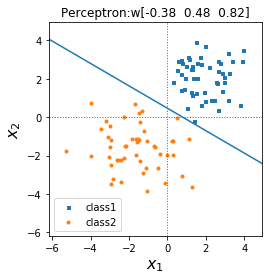

In [21]:
import joy
X, y = joy.joy_data()
ppn = joy.Perceptron(eta = 0.1, epochs=10)
ppn.fit(X, y)
joy.plot_xyw(X, y, ppn.w)
print(ppn.cost_[-1])

4


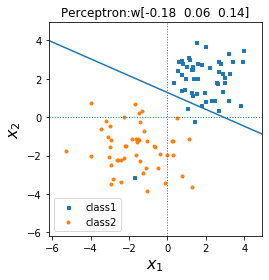

In [23]:
import joy
X, y = joy.joy_Ndata()
ppn = joy.Perceptron(eta = 0.1, epochs=10)
ppn.fit(X, y)
joy.plot_xyw(X, y, ppn.w)
print(ppn.cost_[-1])

0


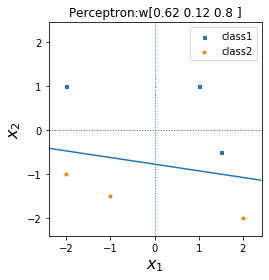

In [25]:
import joy
X, y = joy.toy_data()
ppn = joy.Perceptron(eta = 0.1, epochs=10)
ppn.fit(X, y)
joy.plot_xyw(X, y, ppn.w)
print(ppn.cost_[-1])

## 3. Perceptron class: Iris Dataset 예제

다음 코드는 기계학습 분야에서 잘 알려진 아이리스(붓꽃) 데이터셋을 퍼셉트론으로 분류하는 것입니다.  데이터셋은 세 종류의 붓꽃 품종에 대한 자료가 각 품종 당 50개의 샘플이 있으며, 각 샘플은 4가지 특성으로 구성되어 있습니다.  

`iris_data()`함수는 두 품종(Setosa, Versicolor)의 자료를 각각 50개의 샘플을 읽은 후, 두 개의 특성 즉 꽃잎과 꽃받침의 길이(Cm) 특성를 추출하고, 각 샘플의 클래스 레이블을 반환합니다. 함수의 `standardized` 인자가 참이면, 특성값을 표준화합니다. 모든 자료를 스케일링하여 평균값이 0, 표준편차가 1이 되도록 조정하여 반환합니다. 

In [33]:
import joy
X, y = joy.iris_data()
print(X[:5])
print(y[:5])

[[4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]]
[1 1 1 1 1]


In [34]:
X, y = joy.iris_data()
print(X[-5:])
print(y[-5:])

[[5.7 4.2]
 [6.2 4.3]
 [5.1 3. ]
 [5.7 4.1]
 [6.3 6. ]]
[-1 -1 -1 -1 -1]


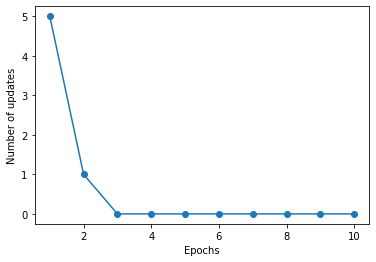

In [44]:
import matplotlib.pyplot as plt  
%matplotlib inline
X, y = joy.iris_data()
ppn = joy.Perceptron(eta = 0.01, epochs = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.cost_) + 1), ppn.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

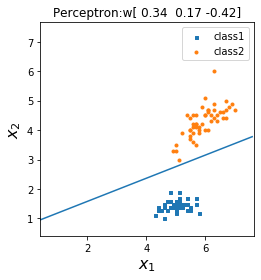

In [45]:
joy.plot_xyw(X, y, ppn.w)

## 4. 가중치 W의 변화를 추적하기

`joy.plot_xyw()`함수에는 가중치의 변화를 추적할 수 있는 기능이 포함되어 있습니다. 함수 인자에 w_ 즉 벡터를 전달하면 이를 인식하여 그래프에 나타냅니다. 

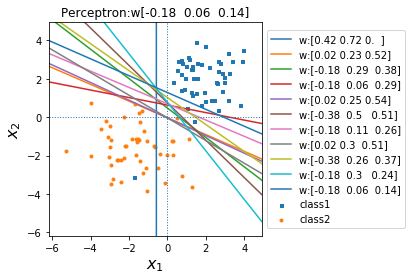

In [6]:
import matplotlib.pyplot as plt  
import joy
%matplotlib inline

X, y = joy.getXy('data/joy_dataNoise.txt')
ppn = joy.Perceptron(eta = 0.1, epochs=10)
ppn.fit(X, y)
joy.plot_xyw(X, y, ppn.w_)

#### plot_decision_regions()
`plot_decision_regions()`함수는 기계학습 분야 개발자들에게 잘 알려진 함수입니다. 이 함수는 객체지향 Perceptron과 클래스의 인스턴스를 받아 그 결과를 시각화합니다. 함수 중간에 각 학습자료를 분류하기 위하여 `predict()` 메소드를 호출합니다. 

[-0.382978    0.47832449  0.82011437]
0


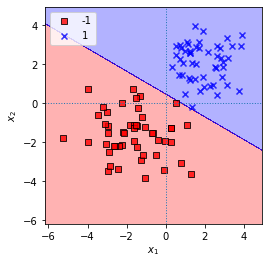

In [10]:
import joy
X, y = joy.joy_data()
ppn = joy.Perceptron(eta = 0.1, epochs=10)
ppn.fit(X, y)
print(ppn.w)
joy.plot_decision_regions(X , y, ppn)
print(ppn.cost_[-1])

#### plot_decision_boundary()

이 함수도 역시 plot_decision_regions()함수와 함께 기계학습 분야 개발자들에게 잘 알려진 함수입니다. 서로 비교를 위해 코딩해본 것입니다. 

[-0.382978    0.47832449  0.82011437]
0


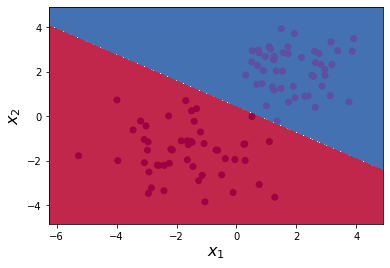

In [11]:
import joy
X, y = joy.joy_data()
ppn = joy.Perceptron(eta = 0.1, epochs=10)
ppn.fit(X, y)
print(ppn.w)
joy.plot_decision_boundary(X.T, y, ppn.predict)
print(ppn.cost_[-1])

## 학습 정리
- 객체지향 퍼셉트론으로 Joy DataSet 적용하기
- OOP의 장점을 활용한 프로그래밍 기법
--------------


# 실험: Weight를 Column vector로 정의할 경우

__다음은 실험적인 코드인 것을 감안하셔서 참고하시길 바랍니다.__ 

가중치 Weight를 Column vector로 정의한 경우를 코딩해본 것입니다. 다음 코드를 유의해야 합니다. 
```
self.w_ = np.vstack([self.w_, self.w.flatten()])
```

In [1]:
#%%writefile code/Perceptron.py
#%load code/Perceptron.py
# # Implementation of Rosenblatt's perceptron algorithm for classification.
# Author: Youngsup KIm, idebtor@gmail.com
# 2018.03.01 - Creation
# 2018.04.18 - works with plot_descision_region(), net_input() modified

import numpy as np

class Perceptron:
    """
    Perceptron classifier: This implementation of the Perceptron expects 
    binary class labels in {0, 1}.
    
    Parameters
        eta : float (default: 0.1), Learning rate (between 0.0 and 1.0)
        epochs : int (default: 10), Number of passes over the training dataset.
            Prior to each epoch, the dataset is shuffled to prevent cycles.
        random_seed : int, Random state for initializing random weights and shuffling.
        
        X0: If True, then X must have X_0 = 1 in all samples.
                Set it Faslse, if X does not have X_0 
    
    Attributes
        w  : 1d-array, shape={n_features, }, Model weights after fitting. Includes bias
        w_ : 2d-array, shape={epochs, n_features}, Weights in every epoch
        cost_ : list, Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.1, epochs=10, random_seed=1):
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed

    def fit(self, X, y, X0=False):
        if X0 == False:
            X = np.c_[ np.ones(len(y)), X]   
            
        np.random.seed(self.random_seed)
        self.w = np.random.random((X.shape[1], 1)) # column vector 
    
        self.maxy, self.miny = y.max(), y.min()
        self.cost_ = []
        self.w_ = np.array([self.w.flatten()])
        
        for i in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                yhat = self.activate(xi)
                if yi != yhat:
                    delta = self.eta * (yi - yhat) * xi    
                    self.w = self.w + delta[:, None]  #w column vector
                    #self.w = self.w + delta 
                    errors += 1
            self.cost_.append(errors)
            self.w_ = np.vstack([self.w_, self.w.flatten()])
        return self

    def net_input(self, X): 
        if X.shape[0] == self.w.shape[0]:
            z = np.dot(self.w.T, X)
        else:                       
            z = np.dot(X, self.w[1:]) + self.w[0]  
        return z

    def activate(self, X):
        mid = (self.maxy + self.miny) / 2
        return np.where(self.net_input(X) > mid, self.maxy, self.miny)
    
    def predict(self, X):   #invoked by plot_decison_regions()
        return self.activate(X)
        